##### K Means Clustering Algorithm

<div style="display:flex">
    <img src='./images/K_means1.png' style="height: 350px; width: 425px;"></img>
    <img src='./images/K_means2.png' style="height: 350px; width: 450px;"></img>
    <img src='./images/K_means3.png' style="height: 350px; width: 475px;"></img>
</div>

<div style="display:flex">
    <img src='./images/K_means4.png' style="height: 350px; width: 425px;"></img>
    <img src='./images/K_means5.png' style="height: 350px; width: 450px;"></img>
    <img src='./images/K_means6.png' style="height: 350px; width: 475px;"></img>
</div>

##### No. of Clusters ?

<div style="display:flex">
    <img src='./images/K_means7.png' style="height: 350px; width: 500px; margin-right: 30px"></img>
    <img src='./images/K_means8.png' style="height: 350px; width: 500px;"></img>
</div>

    Ideally we chose k such that it's the tradeoff b/w min(complexity & SSE), In this case we choose k=4 (Elbow technique)

In [13]:
import pandas as pd

df = pd.read_csv('data/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


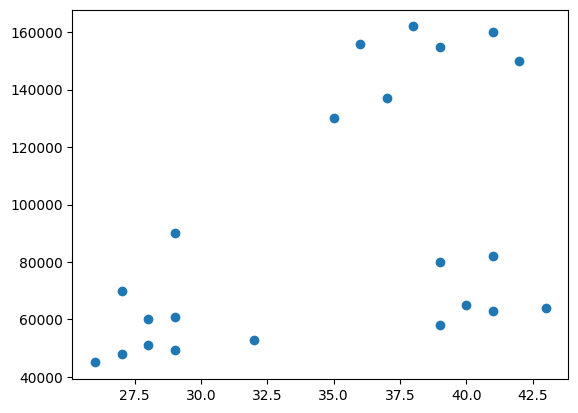

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(df['Age'], df['Income($)'])

In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=10)
km

KMeans(n_clusters=3, n_init=10)

In [16]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [17]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


Text(0, 0.5, 'Income($)')

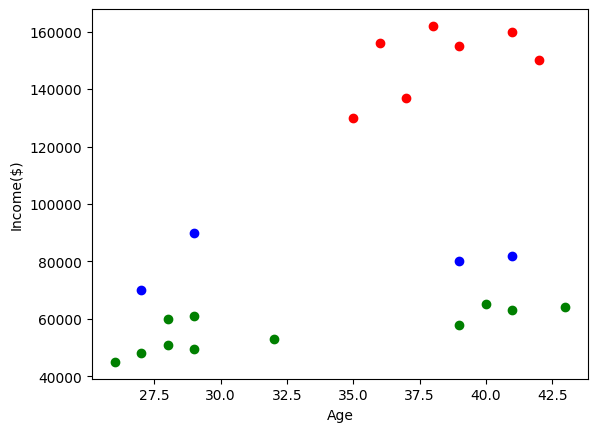

In [18]:
plt.scatter(df['Age'][df['cluster'] == 0], df['Income($)'][df['cluster'] == 0], c='r')
plt.scatter(df['Age'][df['cluster'] == 1], df['Income($)'][df['cluster'] == 1], c='g')
plt.scatter(df['Age'][df['cluster'] == 2], df['Income($)'][df['cluster'] == 2], c='b')

plt.xlabel('Age')
plt.ylabel('Income($)')

In [19]:
# since the features are not scaled properly (Y-axis[120000], X-axis[15]) clustering isnot effectively done
# hence we use MinMaxScaler for properly sclaing data

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


In [20]:
# similarly we scale Age using MinMaxScaler

scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [21]:
# Again fitting data into clusters using K-means method

y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [29]:
# Sum of Squared errors (SSE)
km.inertia_

0.4750783498553097

In [24]:
# centre points of the cluster's
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'Income($)')

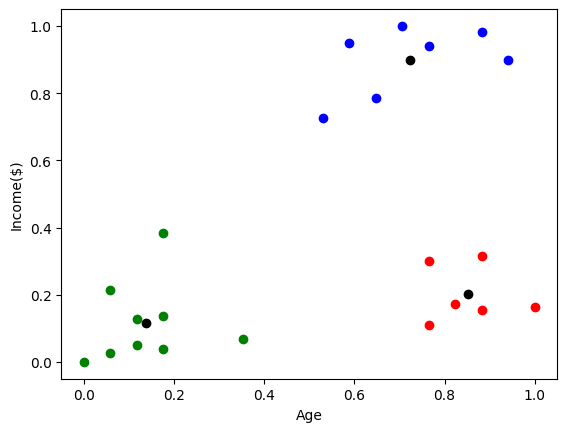

In [28]:
plt.scatter(df['Age'][df['cluster'] == 0], df['Income($)'][df['cluster'] == 0], c='r')
plt.scatter(df['Age'][df['cluster'] == 1], df['Income($)'][df['cluster'] == 1], c='g')
plt.scatter(df['Age'][df['cluster'] == 2], df['Income($)'][df['cluster'] == 2], c='b')

# centres of each cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='black')

plt.xlabel('Age')
plt.ylabel('Income($)')

Text(0, 0.5, 'Sum of Squared Errors (SSE)')

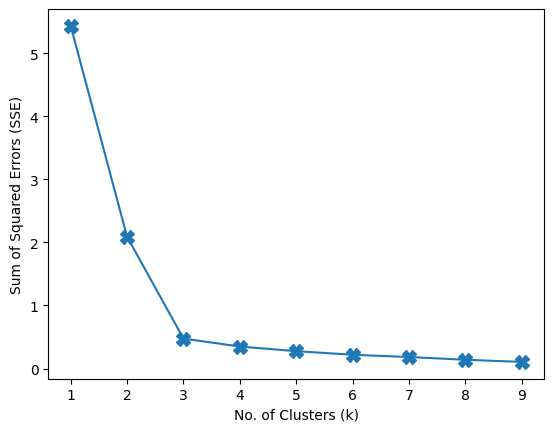

In [38]:
# how to know how many types of clusters can be formed in the dataset ? => Elbow-plot Method

n = range(1,10)
sse = []

for k in n:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
    
plt.plot(n, sse, marker='X',markersize=10)
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')

# at K = 3 we have the elbow hence we select 3 clusters and have plotted it above.